In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('7.csv')
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=60, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 92.73%

Classification Report:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       160
     Coilia dussumieri       1.00      1.00      1.00       125
Otolithoides biauritus       0.67      0.72      0.69       141
     Otolithoides pama       1.00      1.00      1.00       129
     Pethia conchonius       1.00      1.00      1.00       132
  Polynemus paradiseus       1.00      1.00      1.00       159
  Puntius lateristriga       1.00      1.00      1.00       105
        Setipinna taty       0.71      0.66      0.69       146
 Sillaginopsis panijus       1.00      1.00      1.00       127

              accuracy                           0.93      1224
             macro avg       0.93      0.93      0.93      1224
          weighted avg       0.93      0.93      0.93      1224


Confusion Matrix:
[[160   0   0   0   0   0   0   0   0]
 [  0 125   0   0   0   0   0   0   0]
 [  0   0 101   0   0   0  

In [2]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, None],      
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt', 'log2']  
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3,        
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"New Accuracy: {accuracy * 100:.2f}%")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimato

/home/kali/Desktop/Artificial_Intelligence/venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kali/Desktop/Artificial_Intelligence/venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kali/Desktop/Artificial_Intelligence/venv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
New Accuracy: 92.89%


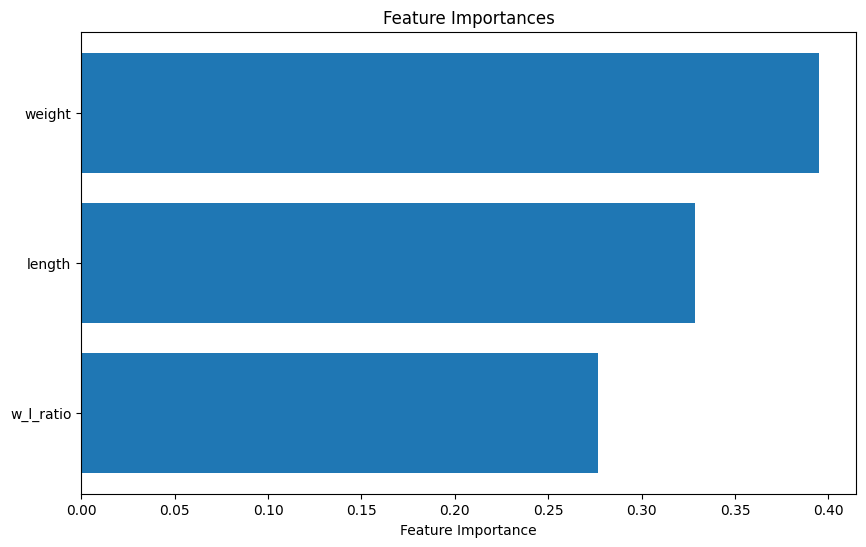

In [3]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_

indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Feature Importance")
plt.show()

In [4]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5) 

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean() * 100:.2f}%")

Cross-validation scores: [0.92401961 0.92156863 0.9375     0.9375     0.93504902]
Mean CV score: 93.11%
